In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train_1 = pd.read_csv('./data/competition_2023/train/subtask_1/en/train.tsv', sep='\t')
test_1 = pd.read_csv('./data/competition_2023/test/subtask_1/en/test.tsv', sep='\t')

train_1.head()

,Unnamed: 0,id,prompt,text,label,model,domain
0,0,12322,you need to stop the,you need to stop the engine and wait until it ...,generated,B,tweets
1,1,1682,Article 11. On the basis of the information co...,The Commission shall publish the report; an in...,generated,C,legal
2,2,22592,I have not been tweeting,"I have not been tweeting a lot lately, but I d...",generated,D,tweets
3,3,17390,NO-PROMPT,I pass my exam and really thankgod for that bu...,human,NO-MODEL,tweets
4,4,30453,NO-PROMPT,The template will have 3 parts: a mustache sha...,human,NO-MODEL,wiki


In [3]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = set(stopwords.words('english'))
    # STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

# import nltk 
# nltk.download('stopwords') # # -> do this in case of 'Resource stopwords not found.'


def preprocessing(df):
    # creating essential columns
    df = df[['text', 'label']]
    df['label_num'] = df['label'].map({'human': 0, 'generated': 1})
    df['message_len'] = df['text'].apply(len)

    # processing text
    df['clean_text'] = df['text'].apply(text_process)

    return df
    

In [4]:
train1 = preprocessing(train_1)
test1 = preprocessing(test_1)

/var/folders/n2/wzhjvsf17gdbklls9d48pdl80000gn/T/ipykernel_77311/823520199.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['label'].map({'human': 0, 'generated': 1})
/var/folders/n2/wzhjvsf17gdbklls9d48pdl80000gn/T/ipykernel_77311/823520199.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_len'] = df['text'].apply(len)
/var/folders/n2/wzhjvsf17gdbklls9d48pdl80000gn/T/ipykernel_77311/823520199.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Text(0.5, 0, 'Message Length')

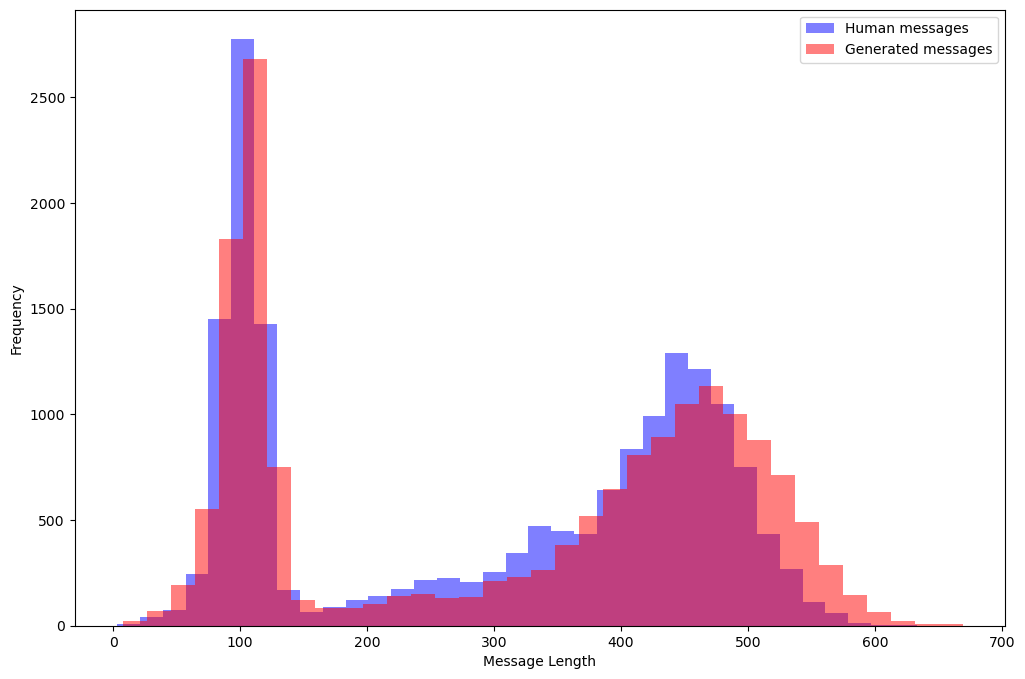

In [5]:
plt.figure(figsize=(12, 8))

train1[train1.label=='human'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Human messages', alpha=0.5)
train1[train1.label=='generated'].message_len.plot(bins=35, kind='hist', color='red', 
                                       label='Generated messages', alpha=0.5)
plt.legend()
plt.xlabel("Message Length")

In [25]:
def plot_common_words(ham_words, type):
    common_words = [word[0] for word in ham_words.most_common(20)]
    word_counts = [word[1] for word in ham_words.most_common(20)]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(common_words, word_counts, color='skyblue')
    plt.title(f'Top 20 Most Common Words in {type} Labeled Data')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right') # Rotation of labels
    plt.tight_layout()
    plt.show()

In [20]:
from collections import Counter

words = train1[train1.label=='human']['clean_text'].apply(lambda x: [word.lower() for word in x.split()])
ham_words_human = Counter()

for msg in words:
    ham_words_human.update(msg)
    
print(ham_words_human.most_common(50))

[('shall', 10632), ('article', 9568), ('regulation', 9122), ('2', 4488), ('1', 4224), ('member', 4188), ('done', 3964), ('states', 3935), ('force', 3658), ('brussels', 3382), ('enter', 3373), ('day', 2934), ('applicable', 2713), ('binding', 2670), ('decision', 2661), ('directly', 2606), ('entirety', 2546), ('may', 2518), ('european', 2487), ('official', 2221), ('annex', 2218), ('journal', 2158), ('publication', 2108), ('following', 1986), ('make', 1821), ('3', 1820), ('use', 1759), ('get', 1532), ('like', 1523), ('ec', 1476), ('communities', 1470), ('time', 1363), ('also', 1362), ('need', 1359), ('one', 1346), ('apply', 1331), ('4', 1261), ('want', 1234), ('addressed', 1212), ('commission', 1054), ('take', 1039), ('hereby', 1007), ('eec', 990), ('im', 985), ('directive', 955), ('sure', 939), ('dont', 935), ('december', 927), ('work', 911), ('community', 908)]


In [22]:
words = train1[train1.label=='generated']['clean_text'].apply(lambda x: [word.lower() for word in x.split()])
ham_words_computer = Counter()

for msg in words:
    ham_words_computer.update(msg)
    
print(ham_words_computer.most_common(50))

[('shall', 5557), ('article', 4762), ('regulation', 3918), ('1', 3516), ('2', 3186), ('may', 2779), ('also', 2474), ('use', 2284), ('3', 2086), ('member', 2025), ('make', 2025), ('commission', 1940), ('one', 1931), ('time', 1684), ('states', 1665), ('get', 1634), ('european', 1583), ('like', 1524), ('need', 1387), ('following', 1374), ('4', 1327), ('want', 1317), ('sure', 1260), ('take', 1258), ('provisions', 1251), ('products', 1221), ('help', 1217), ('council', 1209), ('annex', 1204), ('new', 1167), ('paragraph', 1149), ('used', 1133), ('state', 1125), ('good', 1096), ('accordance', 1072), ('know', 1067), ('way', 1062), ('im', 1009), ('first', 1006), ('apply', 1002), ('decision', 989), ('5', 988), ('it’s', 976), ('community', 967), ('information', 954), ('well', 953), ('using', 953), ('day', 943), ('you’re', 933), ('best', 932)]


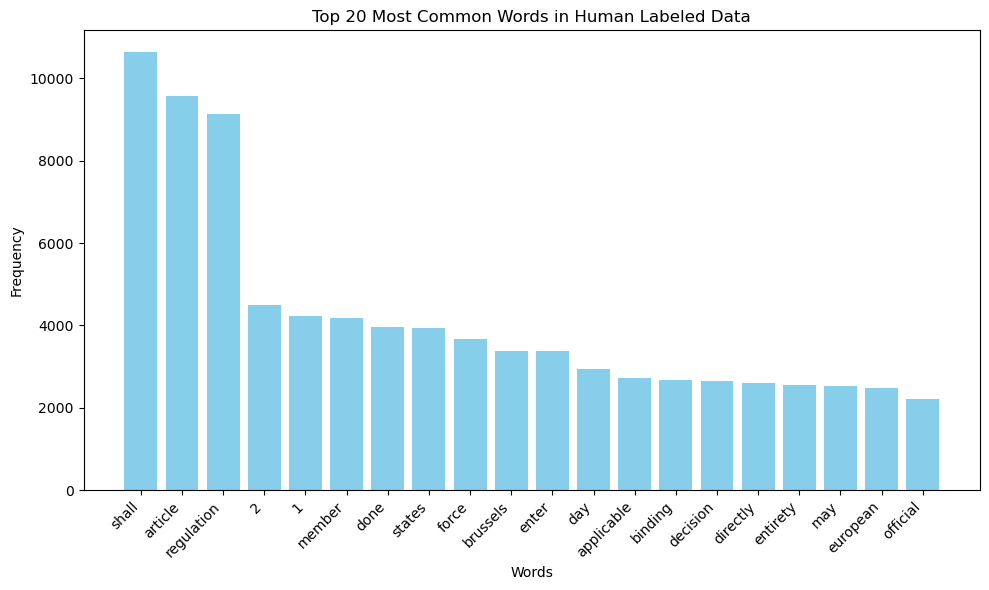

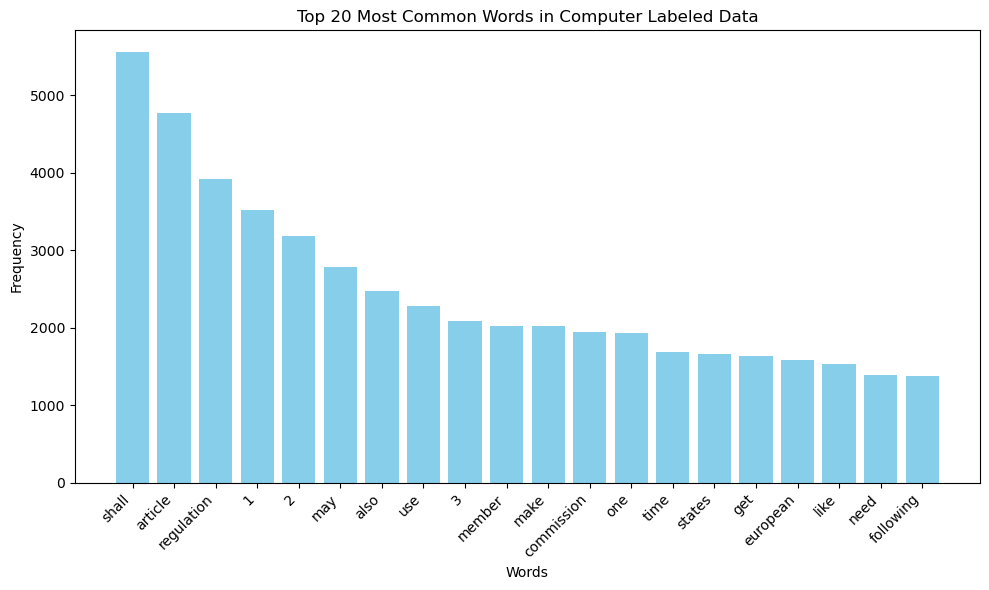

In [26]:
for counter in [(ham_words_human, 'Human'), (ham_words_computer, 'Computer')]:
    plot_common_words(counter[0], counter[1])

In [29]:
print(f"Average Human text length: {train1[train1.label=='generated']['message_len'].mean()}")
print(f"Average Computer text length: {train1[train1.label=='human']['message_len'].mean()}")

Average Human text length: 313.4907434966367
Average Computer text length: 297.1298251789276


In [8]:
from sklearn.model_selection import train_test_split

X_train1 = train1['clean_text']
y_train1 = train1['label_num']
print(X_train1.shape)
print(y_train1.shape)

X_test1 = test1['clean_text']
y_test1 = test1['label_num']

print(X_test1.shape)
print(y_test1.shape)

print(X_train1[:4])
print(y_train1[:4])
train1[:4]

(33845,)
(33845,)
(21832,)
(21832,)
0         need stop engine wait stops would Check safe
1    Commission shall publish report interim report...
2    tweeting lot lately November really good month...
3     pass exam really thankgod idk go shsmy result ah
Name: clean_text, dtype: object
0    1
1    1
2    1
3    0
Name: label_num, dtype: int64


,text,label,label_num,message_len,clean_text
0,you need to stop the engine and wait until it ...,generated,1,100,need stop engine wait stops would Check safe
1,The Commission shall publish the report; an in...,generated,1,571,Commission shall publish report interim report...
2,"I have not been tweeting a lot lately, but I d...",generated,1,100,tweeting lot lately November really good month...
3,I pass my exam and really thankgod for that bu...,human,0,90,pass exam really thankgod idk go shsmy result ah


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train1)

# learn training data vocabulary, then use it to create a document-term matrix
X_train1_dtm = vect.transform(X_train1)

# equivalently: combine fit and transform into a single step
X_train1_dtm = vect.fit_transform(X_train1)


# examine the document-term matrix
print(type(X_train1_dtm), X_train1_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test1_dtm = vect.transform(X_test1)
print(type(X_test1_dtm), X_test1_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (33845, 48556)
<class 'scipy.sparse._csr.csr_matrix'> (21832, 48556)


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train1_dtm)
tfidf_transformer.transform(X_train1_dtm)

<33845x48556 sparse matrix of type '<class 'numpy.float64'>'
	with 810038 stored elements in Compressed Sparse Row format>

In [11]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [12]:
# train the model using X_train1_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train1_dtm, y_train1)

CPU times: user 7.57 ms, sys: 1.17 ms, total: 8.75 ms
Wall time: 7.47 ms


MultinomialNB()

In [13]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred1_class = nb.predict(X_test1_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test1, y_pred1_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test1, y_pred1_class)

=======Accuracy Score===========
0.5633931843165995
=======Confision Matrix===========


array([[ 1813,  8829],
       [  703, 10487]])

In [14]:
from sklearn.metrics import f1_score
print(f"F1-score for Naive Bayes model: {f1_score(y_test1, y_pred1_class, average='macro')}")

F1-score for Naive Bayes model: 0.48155533670042583


In [15]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train1_dtm, y_train1)

CPU times: user 24 s, sys: 7.65 s, total: 31.6 s
Wall time: 3.52 s


LogisticRegression(solver='liblinear')

In [16]:
# make class predictions for X_test_dtm
y_pred1_class = logreg.predict(X_test1_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred1_prob = logreg.predict_proba(X_test1_dtm)[:, 1]
y_pred1_prob

array([0.93389916, 0.59085667, 0.93184684, ..., 0.81031919, 0.88654021,
       0.18314766])

In [17]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test1, y_pred1_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test1, y_pred1_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test1, y_pred1_prob))

=======Accuracy Score===========
0.5996702088677172
=======Confision Matrix===========
[[3829 6813]
 [1927 9263]]
=======ROC AUC Score===========
0.6763923283383709


In [18]:
from sklearn.metrics import f1_score
print(f"F1-score for Logistic Regression model: {f1_score(y_test1, y_pred1_class, average='macro')}")

F1-score for Logistic Regression model: 0.5732312185568607
